# Traffic signal classification using Le-Net #
**Classify traffic signals using Keras and Le-Net CNN**

In [71]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import (
    Dense,
    Activation,
    Flatten,
    Conv2D,
    MaxPooling2D,
    AveragePooling2D,
    Dropout,
)
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix

In [2]:
# load the dataset into train, validation and test
with open("./traffic-signs-data/train.p", mode="rb") as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode="rb") as validation_data:
    validation = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode="rb") as testing_data:
    test = pickle.load(testing_data)

In [3]:
# Divide the data into features and labels
X_train, y_train = train["features"], train["labels"]
X_validation, y_validation = validation["features"], validation["labels"]
X_test, y_test = test["features"], test["labels"]

In [9]:
X_train.shape ,y_train.shape

((34799, 32, 32, 3), (34799,))

**Visualize the Data**

1

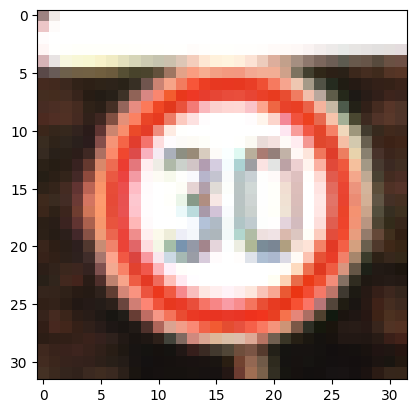

In [18]:
i = 3000
plt.imshow(X_train[i])
y_train[i]

11

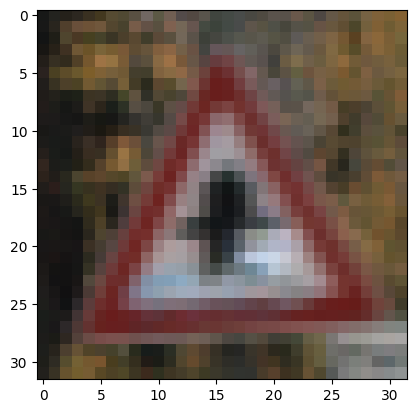

In [20]:
plt.imshow(X_test[i])
y_test[i]

**Data Preparation**

In [23]:
#Shuffle the training dataset
X_train, y_train = shuffle(X_train, y_train)

In [26]:
#Convert the images of train, test and validation to grayscale
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)
X_train_gray.shape , X_test_gray.shape , X_validation_gray.shape

((34799, 32, 32, 1), (12630, 32, 32, 1), (4410, 32, 32, 1))

In [27]:
#normalize the dataset
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

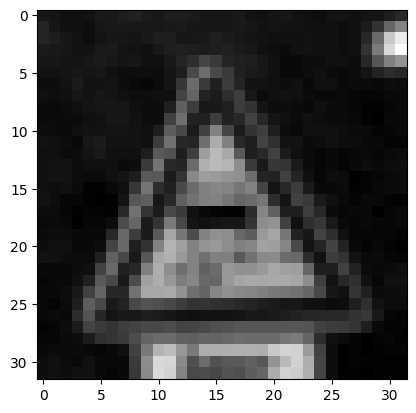

In [28]:
#visualize the grayscale image
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')

**Model training**  
Building a LE-NET model from scratch to perform classification

In [59]:
# Build the model
model = Sequential()
model.add(
    Conv2D(
        filters=6,
        kernel_size=(5, 5),
        input_shape=(32, 32, 1),
        activation="relu",
        padding="same",
    )
)  # 1st convolution layer - 6 filters of 5x5 kernel size
model.add(MaxPooling2D(pool_size=(5, 5)))  # 1st Pooling layer
model.add(
    Conv2D(
        filters=16,
        kernel_size=(5, 5),
        activation="relu",
        padding="same",
    )
)  # 2st convolution layer - 16 filters of 5x5 kernel size
model.add(MaxPooling2D(pool_size=(5, 5)))  # 2nd Pooling layer
model.add(Flatten())  # Flatten the output
model.add(Dense(120, activation="relu"))  # 1st Dense layer - 128 units
model.add(Dense(84, activation="relu"))  # 2nd Dense layer - 84 units
model.add(Dense(43, activation="softmax"))  # Output layer - 43 units

c:\Users\subin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [60]:
# Compile the model with Adam optimizer and sparse_categorical_crossentropy loss function
model.compile(
    optimizer=Adam(3e-4),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [61]:
history = model.fit(
    X_train_gray_norm,
    y_train,
    batch_size=500, 
    epochs=500,
    verbose=1,
    validation_data=(X_validation_gray_norm, y_validation),
)

Epoch 1/500


c:\Users\subin\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0431 - loss: 3.7122 - val_accuracy: 0.0615 - val_loss: 3.5889
Epoch 2/500
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0843 - loss: 3.4547 - val_accuracy: 0.0712 - val_loss: 3.5495
Epoch 3/500
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0971 - loss: 3.3800 - val_accuracy: 0.0825 - val_loss: 3.5196
Epoch 4/500
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1077 - loss: 3.3418 - val_accuracy: 0.0832 - val_loss: 3.4800
Epoch 5/500
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1238 - loss: 3.2763 - val_accuracy: 0.0912 - val_loss: 3.4190
Epoch 6/500
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1481 - loss: 3.1763 - val_accuracy: 0.1200 - val_loss: 3.3107
Epoch 7/500
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1820 - loss: 3.0183 - val_accuracy: 0.1422 - val_loss: 3.1388
Epoch 8/500
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2212 - loss: 2.7972 - val_accuracy: 0.1771 - val_l

**Evaluation**  
Evaluate the model

In [62]:
score = model.evaluate(X_test_gray_norm, y_test)
print("Test Accuracy: {}".format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8075 - loss: 1.3202
Test Accuracy: 0.803246259689331


In [63]:
history.history.keys()  # Get the keys of the history

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [64]:
accuracy = history.history["accuracy"] # Get the training accuracy
val_accuracy = history.history["val_accuracy"] # Get the validation accuracy
loss = history.history["loss"] # Get the training loss
val_loss = history.history["val_loss"] # Get the validation loss

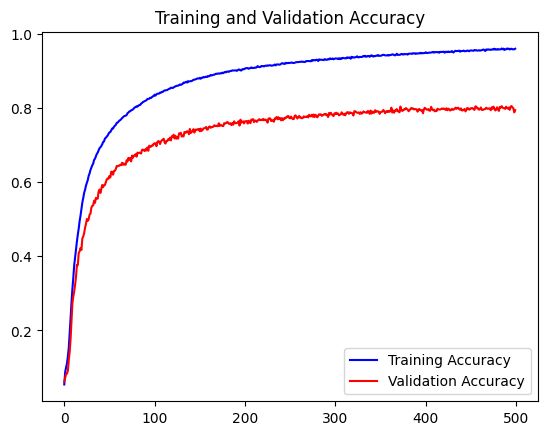

In [66]:
# Plot train and validation accuracy
epochs = range(len(accuracy))  # Get the number of epochs
plt.plot(epochs, accuracy, color="blue", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="red", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

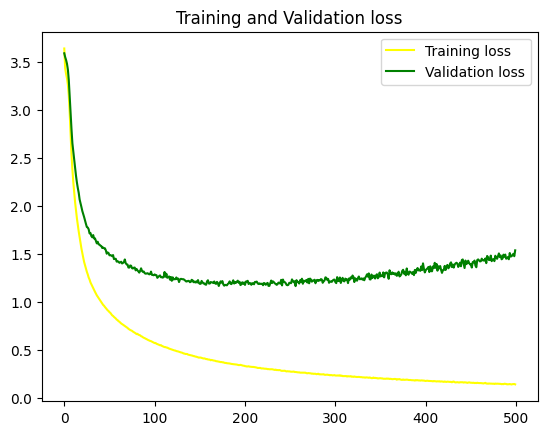

In [67]:
# Plot the train and validation loss
plt.plot(epochs, loss, color="yellow", label="Training loss")
plt.plot(epochs, val_loss, color="green", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()

In [69]:
#Predict the classes of the test dataset
predicted = model.predict(X_test_gray_norm)  # predict the classes
predicted_classes = np.argmax(predicted, axis=1)  # get the predicted classes
y_true = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<Axes: >

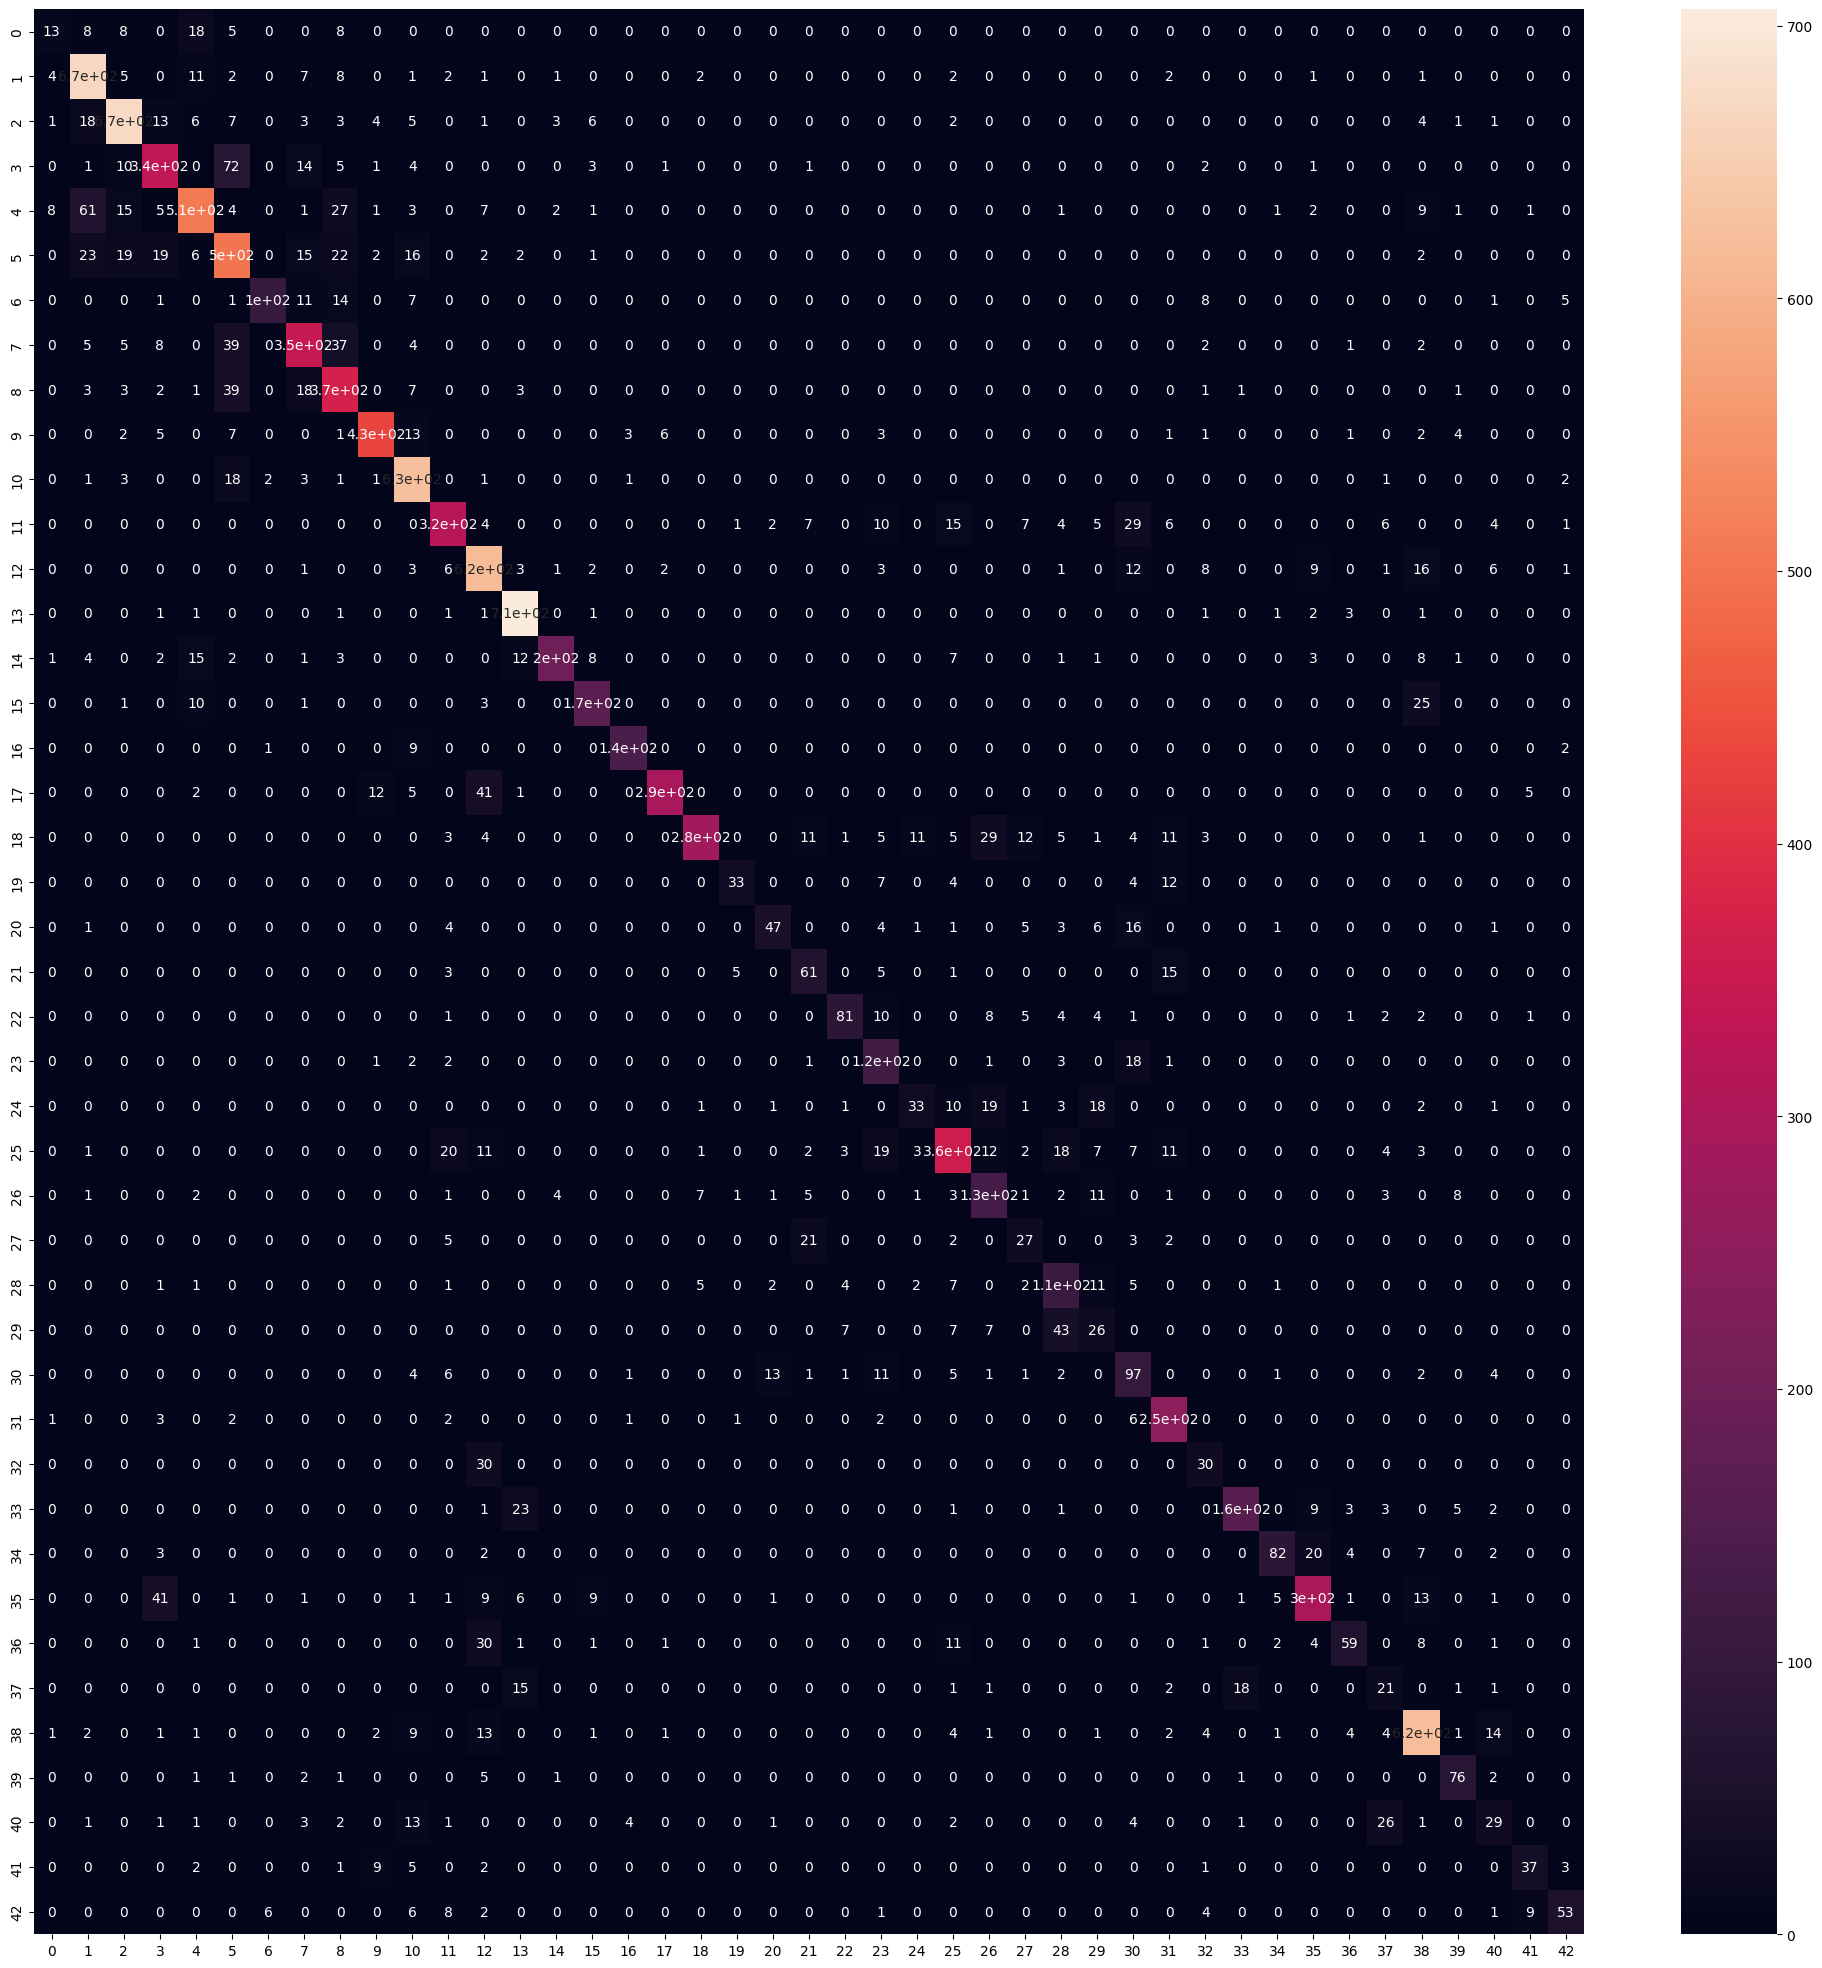

In [72]:
#Create the confusion matrix using true classes and predicted classes
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True)

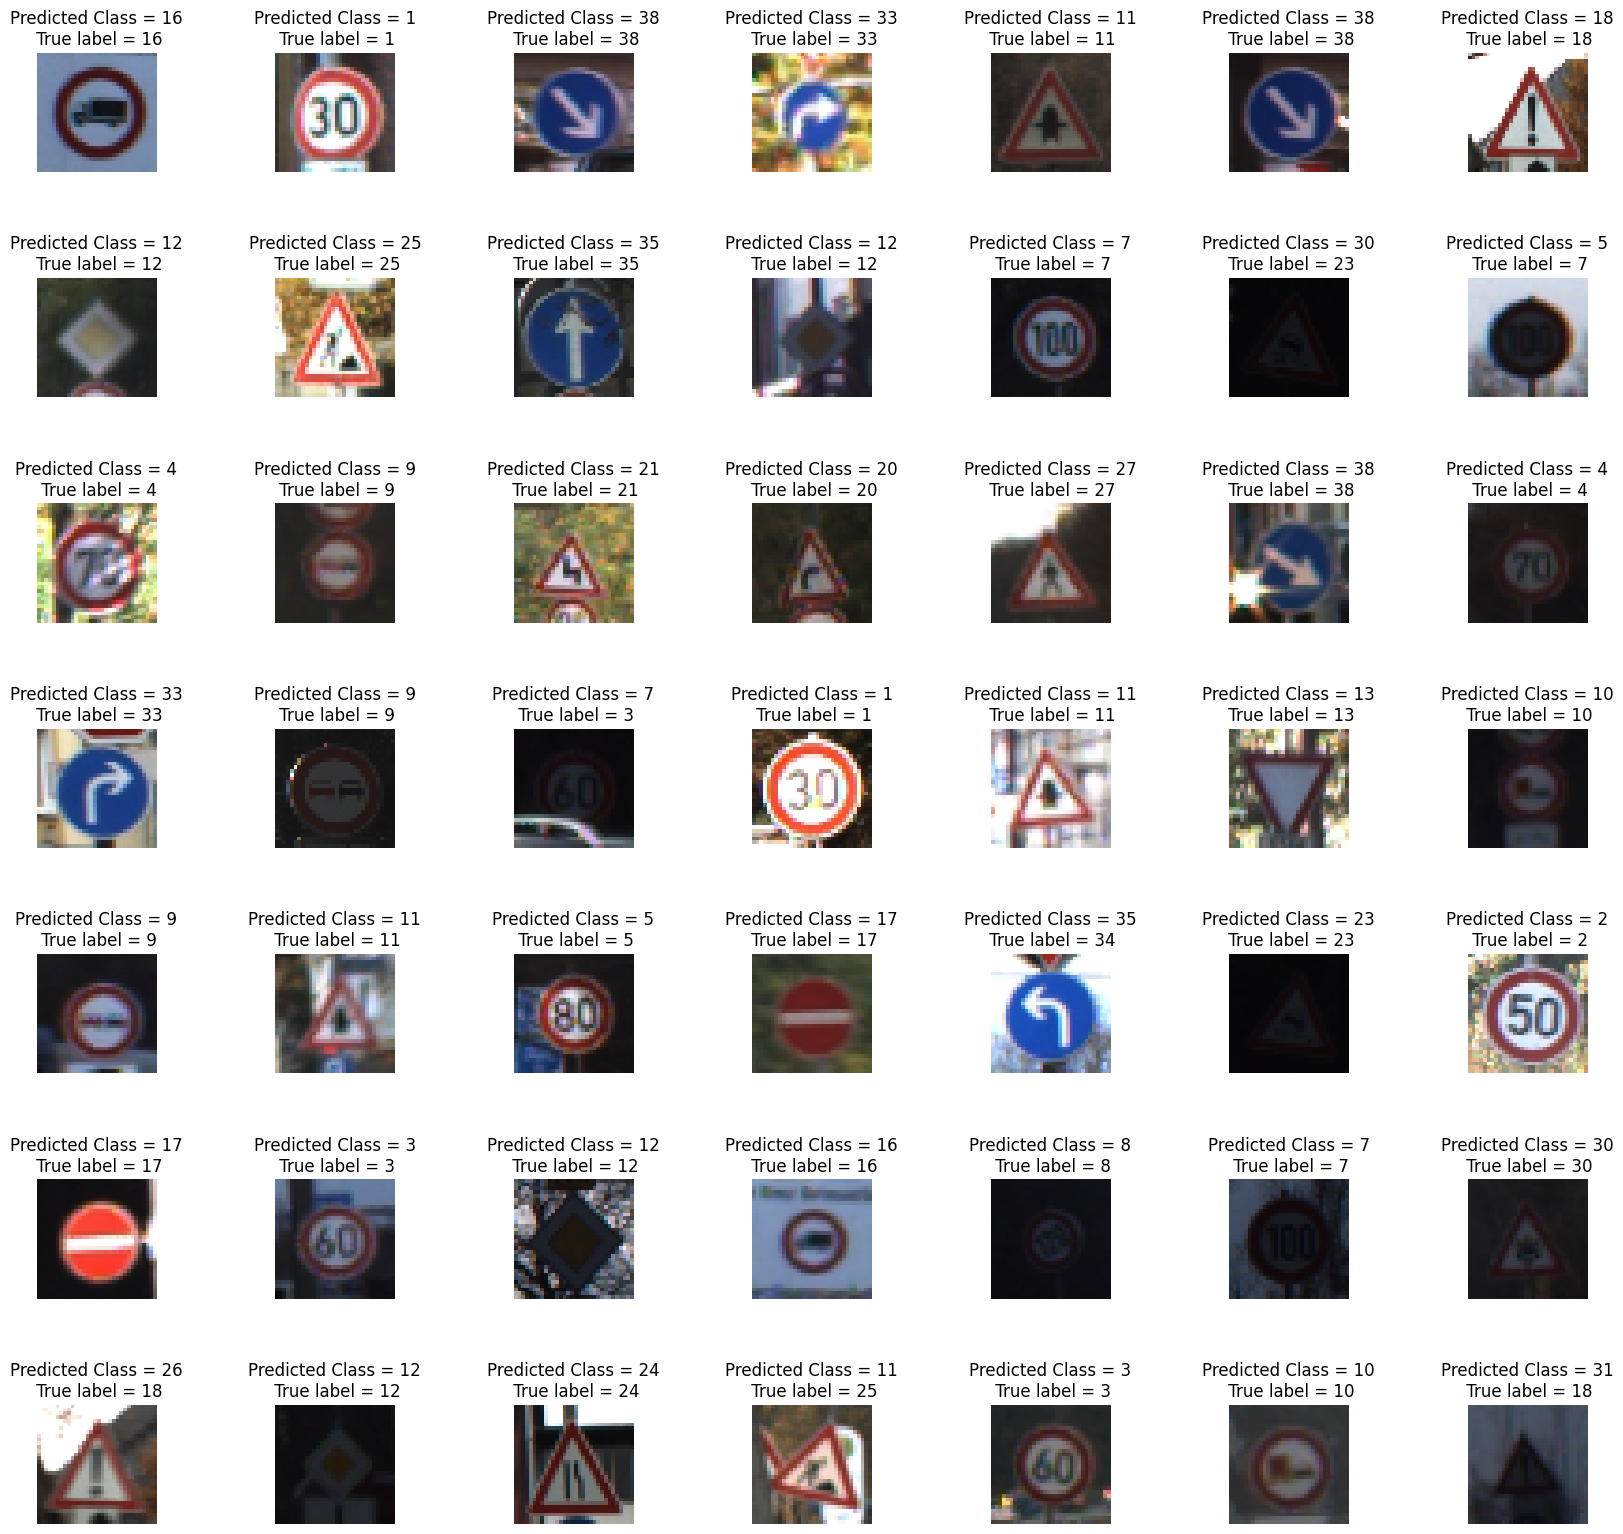

In [76]:
# Plot the images of the test dataset with the predicted classes
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(20, 20))
axes = axes.ravel()
for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(
        "Predicted Class = {}\n True label = {}".format(predicted_classes[i], y_true[i])
    )
    axes[i].axis("off")
plt.subplots_adjust(wspace=1)

# The Le-Net model classifies traffic signals pretty well with only minor misclassifications #